<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learning-with-PyTorch/blob/main/02_Deep_Learning_with_PyTorch_Work_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Pytorch WorkFlow

Let's explore an example of PyTorch end to end work flow

Resources :
  * Note book version of the pytorch work flow : https://www.learnpytorch.io/01_pytorch_workflow/


  **PyTorch WorkFlow :**

1. Getting data ready	Data can be almost anything but to get started we're going to create a simple straight line
2. Building a model	Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.
3. Fitting the model to data (training)	We've got data and a model, now let's let the model (try to) find patterns in the (training) data.
4. Making predictions and evaluating a model (inference)	Our model's found patterns in the data, let's compare its findings to the actual (testing) data.
5. Saving and loading a model	You may want to use your model elsewhere, or come back to it later, here we'll cover that.
6. Putting it all together	Let's take all of the above and combine it.


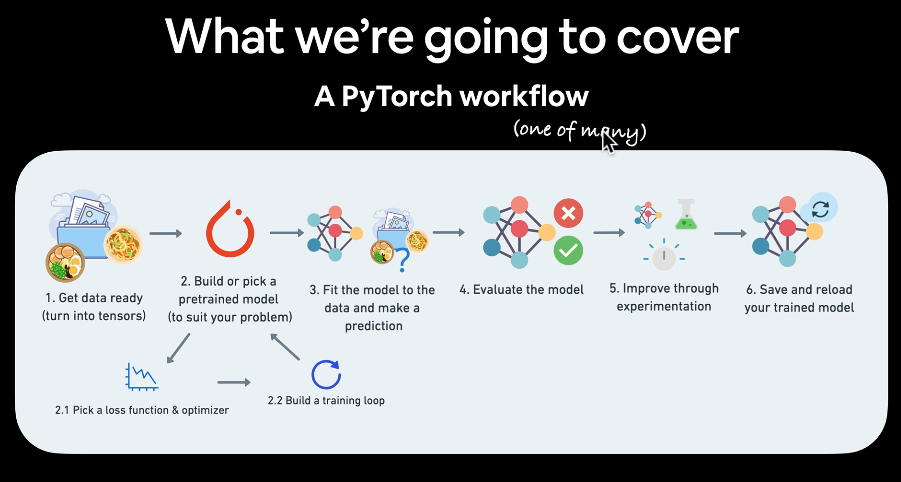

In [14]:
what_are_we_covering = {
    1 : "data (prepare and load)",
    2 : "Build a model",
    3 : "fitting the model (training)",
    4 : "making predictions and evaluating a model (inference)",
    5 : "putting it all together"
}

print(what_are_we_covering)

{1: 'data (prepare and load)', 2: 'Build a model', 3: 'fitting the model (training)', 4: 'making predictions and evaluating a model (inference)', 5: 'putting it all together'}


#### Layers in Pytorch
The torch.nn : contains all the layers to build a model, input layers and hidden layers and output layer etc...we can combine all the layers to make our expected model :  https://pytorch.org/docs/stable/nn.html



In [15]:
import torch
from torch import nn # nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check the pytorch version
print(torch.__version__)



2.1.0+cu121


# 1. Data (Preparing and loading )

Data can be almost anything...in machine learning

* Excel spreadsheet
* Images of anykind
* Videos(Youttube has lot of data)
* Audio like songs or podcosts
* DNA
* Text

Machine learning is a game of two parts
  1. Get data into numarical representation
  2. Build a model to learn pattern in that numarical representation

  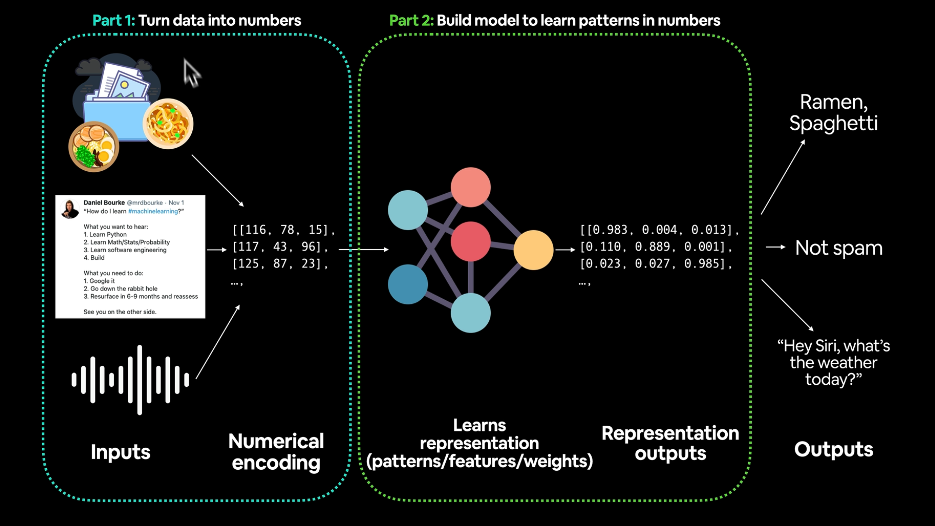

 * To showcase above 2 steps, Let's create some known data using the linear regression formula

 * we'll use linear regression formula to make a straight line with known parameters




In [16]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [17]:
len(X), len(y)

(50, 50)

#### Splitting data into training and test datasets (Most imporant concepts in the Machine Learning)
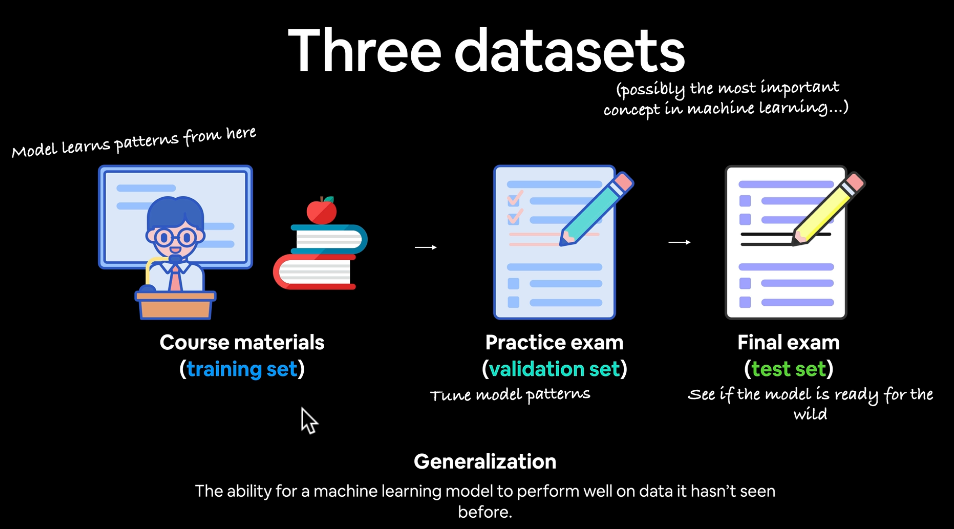

Generalization : Tha ability for a machine learning model to perform well on data it hasn't seen before

In [18]:
# Create a train/test split

train_split = int(0.8 * len(X))
print(train_split) # 40

X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


40


(40, 40, 10, 10)

How might we better visualize our data ?

this is where the data explorer's motto comes in !!

"Visualize visualize visualize"

In [19]:
def plot_predictions(train_data=X_train,
                     train_labels =y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  '''
  Plot training data, test data and compares the predictions
  '''
  # Plot the training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")

  #Plot the testig data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")

  # Are there predictions
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label = "Predictions")

  # Show the legend
  plt.legend(prop={'size':14})



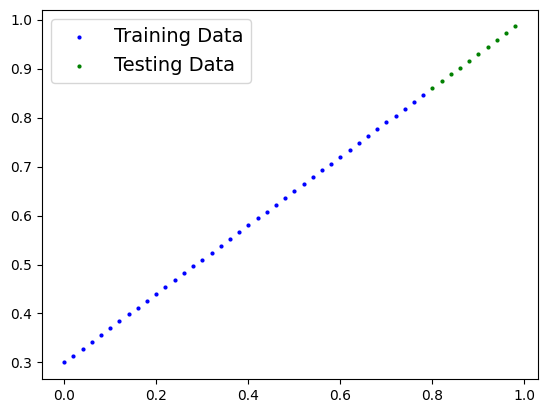

In [20]:
plot_predictions()

#### 2. Building PyTorch Model

our first pytorch model!!

This is very exciting...let's do it!

Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in python, to do so you can use the fllowing resource from Real Python : https://realpython.com/python3-object-oriented-programming/


What our model does ??
  * Start with random values (weight and bias)
  * Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)


How does it do so ?
  
Through two main algorithms

  1. Gradient descent : https://www.youtube.com/watch?v=IHZwWFHWa-w&feature=youtu.be
  2. Back Propagation : https://www.youtube.com/watch?v=Ilg3gGewQ5U

  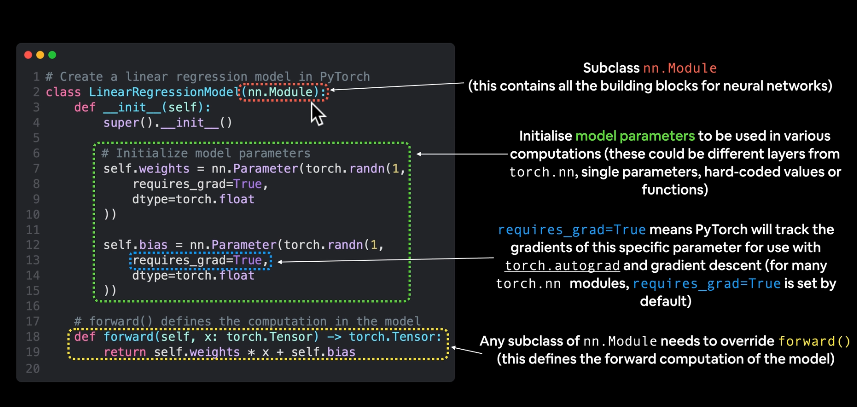


In [13]:

# Create linear regression model class
from torch import nn


class LinearRegressionModel(nn.Module):# <- Almost everything in PyTorch inherits from the nn module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype =torch.float))

  # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor)-> torch.Tensor: # <- x is the input data
    return self.weights * x + self.bias # this is the linear regression formula


